In [189]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [190]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [191]:
customers = pd.read_csv("Dataset/customers.csv")
geolocation = pd.read_csv('Dataset/geolocation.csv')
products = pd.read_csv('Dataset/products.csv')
orders = pd.read_csv('Dataset/orders.csv')
sellers = pd.read_csv('Dataset/sellers.csv')
order_items = pd.read_csv('Dataset/order_items.csv')
category = pd.read_csv('Dataset/product_name.csv')
reviews = pd.read_csv('Dataset/reviews.csv')

In [192]:
products
geolocation
category
products
customers
orders
sellers
reviews
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [193]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [194]:
orders_with_customer_location = orders.merge(customers,on='customer_id')

In [195]:
order_with_location_and_freight = orders_with_customer_location.merge(order_items,on='order_id')

In [196]:
order_with_location_freight_and_reviews = order_with_location_and_freight.merge(reviews,on='order_id')

In [197]:
geo_shipping_costs = order_with_location_freight_and_reviews.groupby('customer_zip_code_prefix')['freight_value'].mean().reset_index()
geo_shipping_costs.columns = ['zip_code', 'avg_shipping_cost']

In [198]:
geo_shipping_costs

,zip_code,avg_shipping_cost
0,1003,8.980000
1,1004,9.560000
2,1005,13.355000
3,1006,16.625000
4,1007,12.517500
...,...,...
14950,99960,16.630000
14951,99965,31.845000
14952,99970,23.740000
14953,99980,18.296667


In [199]:
location_data = geolocation.merge(geo_shipping_costs, left_on='geolocation_zip_code_prefix', right_on='zip_code', how='left')
location_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code,avg_shipping_cost
0,1037,-23.545621,-46.639292,sao paulo,SP,1037.0,21.707500
1,1046,-23.546081,-46.644820,sao paulo,SP,1046.0,10.879412
2,1046,-23.546129,-46.642951,sao paulo,SP,1046.0,10.879412
3,1041,-23.544392,-46.639499,sao paulo,SP,1041.0,42.600000
4,1035,-23.541578,-46.641607,sao paulo,SP,1035.0,10.457000
...,...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,99950.0,22.151111
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,99900.0,21.666250
1000160,99950,-28.071855,-52.014716,tapejara,RS,99950.0,22.151111
1000161,99980,-28.388932,-51.846871,david canabarro,RS,99980.0,18.296667


In [200]:
regional_shipping_costs = location_data.groupby('geolocation_state')['avg_shipping_cost'].mean().reset_index()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_13668\2021948455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_shipping_costs, x='avg_shipping_cost', y='geolocation_state', palette='viridis')


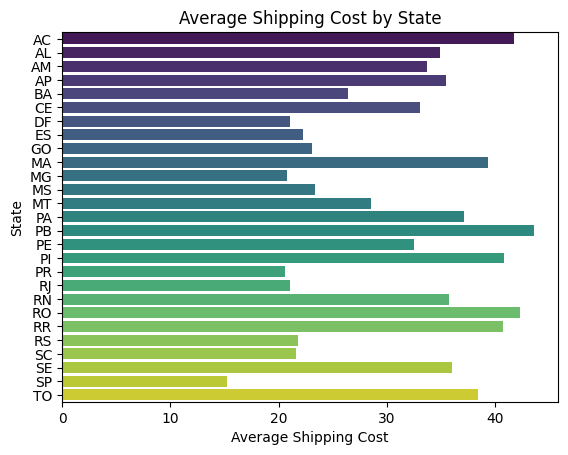

In [201]:
sns.barplot(data=regional_shipping_costs, x='avg_shipping_cost', y='geolocation_state', palette='viridis')
plt.title('Average Shipping Cost by State')
plt.xlabel('Average Shipping Cost')
plt.ylabel('State')
plt.show()

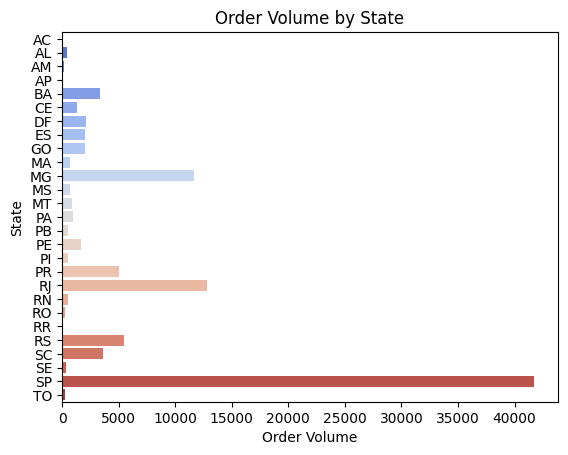

In [202]:
order_volume_by_region = orders.merge(customers, on='customer_id', how='left') \
                                .groupby('customer_state')['order_id'] \
                                .count() \
                                .reset_index(name='order_volume')

# Visualize order volume by state
sns.barplot(data=order_volume_by_region, x='order_volume', y='customer_state',hue='customer_state', dodge=False, legend=False, palette='coolwarm')
plt.title('Order Volume by State')
plt.xlabel('Order Volume')
plt.ylabel('State')
plt.show()

In [203]:
avg_rating = reviews.merge(order_items,on='order_id').groupby('product_id')['review_score'].mean().reset_index()
avg_rating.columns = ['product_id', 'avg_rating']
avg_rating

,product_id,avg_rating
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32784,fff6177642830a9a94a0f2cba5e476d1,4.5
32785,fff81cc3158d2725c0655ab9ba0f712c,4.0
32786,fff9553ac224cec9d15d49f5a263411f,5.0
32787,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


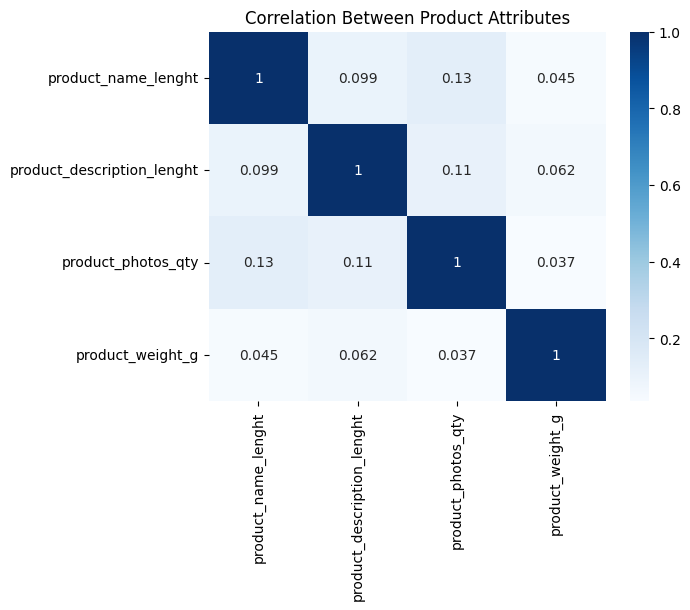

In [204]:
correlation = products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g']].corr()
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Between Product Attributes')
plt.show()

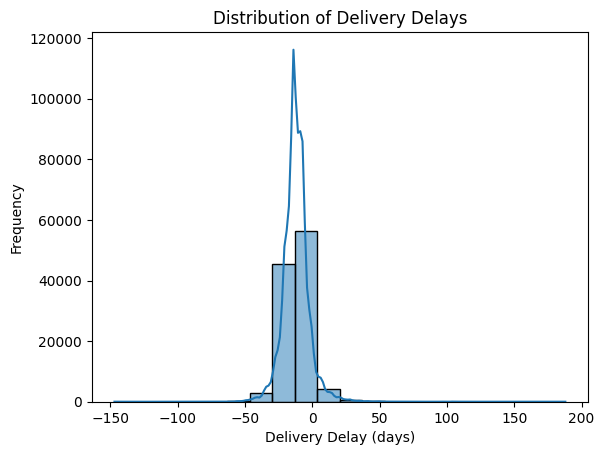

In [205]:
order_with_location_freight_and_reviews['delivery_delay'] = (pd.to_datetime(order_with_location_freight_and_reviews['order_delivered_customer_date']) - 
                            pd.to_datetime(order_with_location_freight_and_reviews['order_estimated_delivery_date'])).dt.days

avg_delay_by_seller = order_with_location_freight_and_reviews.groupby('seller_id')['delivery_delay'].mean().reset_index()
avg_delay_by_seller.columns = ['seller_id', 'avg_delivery_delay']

sns.histplot(order_with_location_freight_and_reviews['delivery_delay'].dropna(), bins=20, kde=True)
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Frequency')
plt.show()


In [206]:
geo_shipping_costs

,zip_code,avg_shipping_cost
0,1003,8.980000
1,1004,9.560000
2,1005,13.355000
3,1006,16.625000
4,1007,12.517500
...,...,...
14950,99960,16.630000
14951,99965,31.845000
14952,99970,23.740000
14953,99980,18.296667


In [207]:
order_with_location_freight_and_reviews

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,2018-02-12 13:10:37,174.90,20.10,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,-2.0
112368,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,2017-09-05 15:04:16,205.99,65.02,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,-6.0
112369,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,2018-01-12 21:36:21,179.99,40.59,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,-21.0
112370,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,2018-01-12 21:36:21,179.99,40.59,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,-21.0


In [208]:
order_with_location_freight_and_reviews = order_with_location_freight_and_reviews.merge(geo_shipping_costs, left_on='customer_zip_code_prefix', right_on='zip_code', how='left')
order_with_location_freight_and_reviews
order_with_location_freight_and_reviews['regional_multiplier'] = 1 + (order_with_location_freight_and_reviews['avg_shipping_cost'] / order_with_location_freight_and_reviews['avg_shipping_cost'].max())

In [209]:
delivery_delay_max = order_with_location_freight_and_reviews['delivery_delay'].max()

order_with_location_freight_and_reviews['delivery_multiplier'] = np.where(
    order_with_location_freight_and_reviews['delivery_delay'] <= 0, 
    1 + (1 / (1 + abs(order_with_location_freight_and_reviews['delivery_delay']))),  
    1 - (order_with_location_freight_and_reviews['delivery_delay'] / delivery_delay_max)  
)

In [210]:
order_with_location_freight_and_reviews = order_with_location_freight_and_reviews.merge(avg_rating,on='product_id')

In [211]:
order_with_location_freight_and_reviews['review_multiplier'] = order_with_location_freight_and_reviews['avg_rating'].apply(lambda rating: 0.8 + (rating - 1) * 0.1)

In [216]:
order_volume_by_region['volume_multiplier'] = 1 + (order_volume_by_region['order_volume'] / order_volume_by_region['order_volume'].max())

order_with_location_freight_and_reviews = order_with_location_freight_and_reviews.merge(
    order_volume_by_region[['customer_state', 'volume_multiplier']], 
    left_on='customer_state', 
    right_on='customer_state', 
    how='left'
)

In [217]:
order_with_location_freight_and_reviews['base_price'] = order_with_location_freight_and_reviews['price']
order_with_location_freight_and_reviews['dynamic_price'] = order_with_location_freight_and_reviews['base_price'] * \
                                       order_with_location_freight_and_reviews['regional_multiplier'] * \
                                       order_with_location_freight_and_reviews['delivery_multiplier'] * \
                                       order_with_location_freight_and_reviews['review_multiplier']

In [218]:
order_with_location_freight_and_reviews['profit_loss_percentage'] = (
    (order_with_location_freight_and_reviews['dynamic_price'] - order_with_location_freight_and_reviews['base_price']) / 
    order_with_location_freight_and_reviews['base_price']
) * 100

In [223]:
order_with_location_freight_and_reviews

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,zip_code,avg_shipping_cost,regional_multiplier,delivery_multiplier,avg_rating,review_multiplier,base_price,dynamic_price,volume_multiplier,profit_loss_percentage
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3149,10.255000,1.038397,1.111111,4.000000,1.100000,29.99,76.123711,2.000000,153.830313
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,47813,21.696000,1.081234,1.142857,4.405660,1.140566,118.70,180.840126,1.080966,52.350569
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,75265,21.772500,1.081521,1.052632,5.000000,1.200000,159.90,229.014434,1.048388,43.223536
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,59296,26.717500,1.100036,1.071429,4.250000,1.125000,45.00,60.360313,1.011618,34.134029
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,9195,15.496400,1.058022,1.090909,3.725000,1.072500,19.90,49.267832,2.000000,147.577047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,11722,24.620000,1.092182,1.333333,4.000000,1.100000,174.90,560.333114,2.000000,220.373421
112368,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,45920,65.020000,1.243448,1.142857,3.666667,1.066667,205.99,337.525265,1.080966,63.855170
112369,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,28685,26.658750,1.099816,1.045455,4.194118,1.119412,179.99,302.987798,1.307862,68.335907
112370,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,28685,26.658750,1.099816,1.045455,4.194118,1.119412,179.99,302.987798,1.307862,68.335907


c:\Users\Ayush\ML-Projects\MovieLens\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


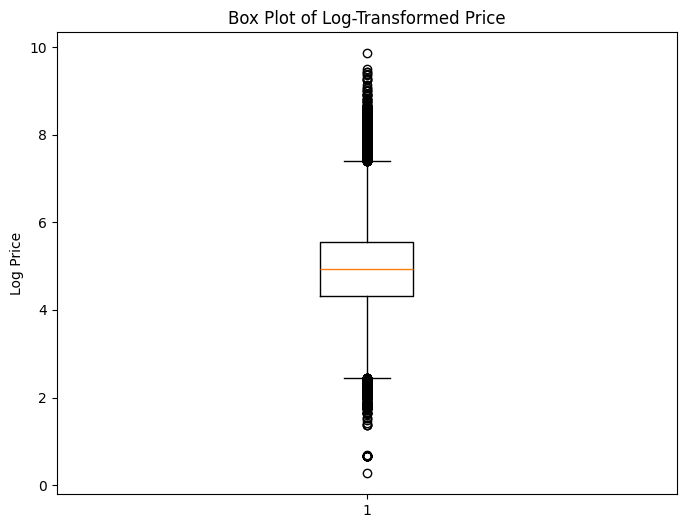

In [235]:
order_with_location_freight_and_reviews['log_price'] = np.log(order_with_location_freight_and_reviews['dynamic_price']) 
plt.figure(figsize=(8,6)) 
plt.boxplot(order_with_location_freight_and_reviews['log_price']) 
plt.title('Box Plot of Log-Transformed Price') 
plt.ylabel('Log Price')
plt.show()

In [280]:
features = ['regional_multiplier', 'delivery_multiplier', 'review_multiplier', 'volume_multiplier', 'price'] 
target = 'log_price'

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

order_with_location_freight_and_reviews.dropna(subset=features + [target], inplace=True)

X = order_with_location_freight_and_reviews[features]
y = order_with_location_freight_and_reviews[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

order_with_location_freight_and_reviews.replace([np.inf, -np.inf], np.nan, inplace=True)
order_with_location_freight_and_reviews.dropna(inplace=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.42081362423665714
R-squared: 0.5457506416582656


In [284]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test) 
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')
y_pred = np.exp(y_pred_log)
print('MSE:', mean_squared_error(np.exp(y_test), y_pred))
print('R² Score:', r2_score(np.exp(y_test), y_pred))

MSE: 3270.023310007517
R² Score: 0.9730218083717576


In [ ]:
# # Step 7: Hyperparameter Tuning (Example using GridSearchCV for Random Forest)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
# grid_search.fit(X_train_scaled, y_train)

# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best R-squared score: {grid_search.best_score_}')

# # Evaluate the best model
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test_scaled)
# mse_best = mean_squared_error(y_test, y_pred_best)
# r2_best = r2_score(y_test, y_pred_best)

# print(f'Mean Squared Error of Best Model: {mse_best}')
# print(f'R-squared of Best Model: {r2_best}')

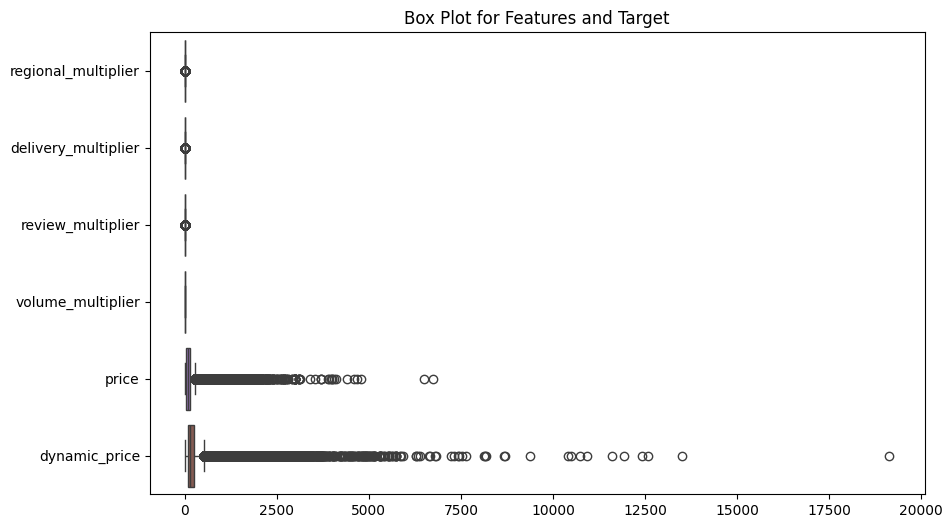

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features and target into one DataFrame for easier plotting
data = order_with_location_freight_and_reviews[features + [target]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title("Box Plot for Features and Target")
plt.show()


Text(0, 0.5, 'Price')

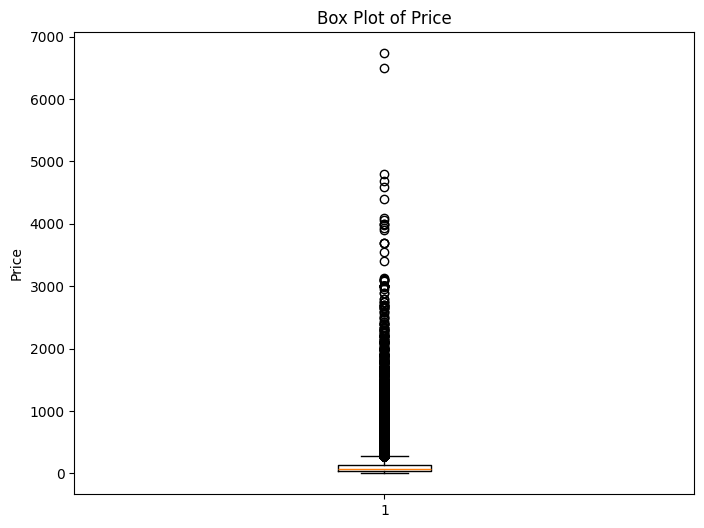

In [230]:
plt.figure(figsize=(8,6)) 
plt.boxplot(order_with_location_freight_and_reviews['price']) 
plt.title('Box Plot of Price')
plt.ylabel('Price')

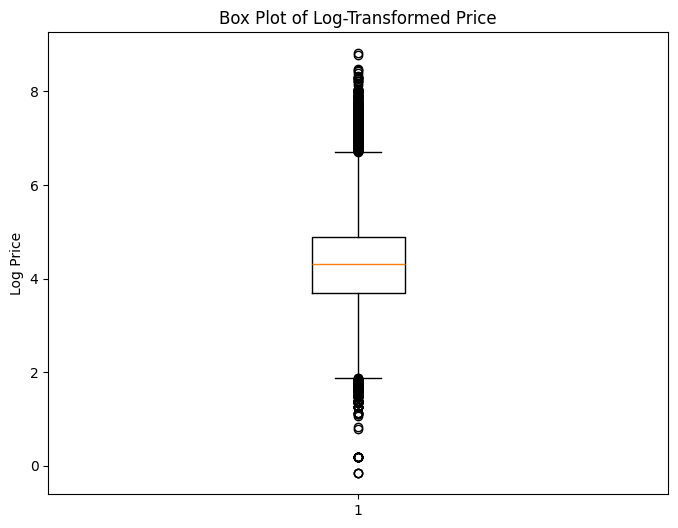